<a href="https://colab.research.google.com/github/POORNI-AIDA/cd/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Decision Tree

#Importing the necessary libraries

In [ ]:
!pip install --q scalecast

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error

#Importing the dataset-
# Load the dataset (assuming 'bank_stock_prices.csv' is the name of your dataset file)

In [ ]:
d= pd.read_csv('Bank_Stock_Price_10Y.csv')
d

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-02-03,1980.0,2000.0,1965.0,1965.0,1691.382568,55407000
1,2014-02-04,1970.0,1980.0,1940.0,1970.0,1695.686035,83683500
2,2014-02-05,1980.0,1990.0,1965.0,1990.0,1712.901367,42715000
3,2014-02-06,1975.0,2030.0,1970.0,2030.0,1747.331299,63581000
4,2014-02-07,2050.0,2060.0,2035.0,2050.0,1764.546753,104825500
...,...,...,...,...,...,...,...
2478,2024-01-24,9600.0,9600.0,9475.0,9525.0,9525.000000,84906000
2479,2024-01-25,9450.0,9575.0,9450.0,9500.0,9500.000000,63212700
2480,2024-01-26,9400.0,9450.0,9300.0,9350.0,9350.000000,78977300
2481,2024-01-29,9400.0,9550.0,9375.0,9550.0,9550.000000,73452800


#Describing the dataset

In [ ]:
d.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-02-03,1980.0,2000.0,1965.0,1965.0,1691.382568,55407000
1,2014-02-04,1970.0,1980.0,1940.0,1970.0,1695.686035,83683500
2,2014-02-05,1980.0,1990.0,1965.0,1990.0,1712.901367,42715000
3,2014-02-06,1975.0,2030.0,1970.0,2030.0,1747.331299,63581000
4,2014-02-07,2050.0,2060.0,2035.0,2050.0,1764.546753,104825500


In [ ]:
d.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2478,2024-01-24,9600.0,9600.0,9475.0,9525.0,9525.0,84906000
2479,2024-01-25,9450.0,9575.0,9450.0,9500.0,9500.0,63212700
2480,2024-01-26,9400.0,9450.0,9300.0,9350.0,9350.0,78977300
2481,2024-01-29,9400.0,9550.0,9375.0,9550.0,9550.0,73452800
2482,2024-01-30,9500.0,9650.0,9475.0,9650.0,9650.0,73136400


In [ ]:
d.shape

(2483, 7)

In [ ]:
d.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2483.000000,2483.000000,2483.000000,2483.000000,2483.000000,2.483000e+03
mean,5219.973822,5265.847765,5173.628675,5219.887233,4886.148684,7.997496e+07
std,2223.156537,2240.113146,2206.459905,2223.903144,2276.934419,5.378122e+07
min,1970.000000,1980.000000,1940.000000,1965.000000,1691.382568,0.000000e+00
25%,2955.000000,2985.000000,2930.000000,2950.000000,2612.564454,5.153575e+07
50%,5170.000000,5235.000000,5120.000000,5180.000000,4736.543945,7.009800e+07
75%,6822.500000,6890.000000,6740.000000,6800.000000,6349.964111,9.651755e+07
max,9775.000000,9775.000000,9675.000000,9750.000000,9750.000000,1.062862e+09


In [ ]:
d.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2483 entries, 0 to 2482
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2483 non-null   object 
 1   Open       2483 non-null   float64
 2   High       2483 non-null   float64
 3   Low        2483 non-null   float64
 4   Close      2483 non-null   float64
 5   Adj Close  2483 non-null   float64
 6   Volume     2483 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 135.9+ KB


#Checking the null values

In [ ]:
d.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

#Separate the independent and dependent variables using slicing method

In [ ]:
X = d.iloc[:, :-1].values
y = d.iloc[:, -1].values

In [ ]:
print(X)

[[Timestamp('2014-02-03 00:00:00') 1980.0 2000.0 1965.0 1965.0
  1691.382568]
 [Timestamp('2014-02-04 00:00:00') 1970.0 1980.0 1940.0 1970.0
  1695.686035]
 [Timestamp('2014-02-05 00:00:00') 1980.0 1990.0 1965.0 1990.0
  1712.901367]
 ...
 [Timestamp('2024-01-26 00:00:00') 9400.0 9450.0 9300.0 9350.0 9350.0]
 [Timestamp('2024-01-29 00:00:00') 9400.0 9550.0 9375.0 9550.0 9550.0]
 [Timestamp('2024-01-30 00:00:00') 9500.0 9650.0 9475.0 9650.0 9650.0]]


In [ ]:
print(y)

[55407000 83683500 42715000 ... 78977300 73452800 73136400]


In [ ]:
# Slicing for independent variables (features)
X_features = [row[:-1] for row in d]  # Exclude the last column which is assumed to be the dependent variable

# Slicing for dependent variable (target)
y_target = [row[-1] for row in d]  # Assuming the last column is the dependent variable

print("Independent variables (features):", X_features)
print("Dependent variable (target):", y_target)


Independent variables (features): ['Dat', 'Ope', 'Hig', 'Lo', 'Clos', 'Adj Clos', 'Volum']
Dependent variable (target): ['e', 'n', 'h', 'w', 'e', 'e', 'e']


#Split the data into training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [ ]:
print(X_train)

[['2022-10-24' 8750.0 8900.0 8725.0 8900.0 8650.384766]
 ['2018-07-16' 4610.0 4625.0 4580.0 4625.0 4199.044922]
 ['2023-08-09' 9275.0 9400.0 9250.0 9400.0 9355.363281]
 ...
 ['2018-06-27' 4280.0 4340.0 4270.0 4270.0 3876.740479]
 ['2015-01-19' 2595.0 2605.0 2595.0 2600.0 2261.860107]
 ['2018-05-09' 4305.0 4580.0 4305.0 4580.0 4158.189941]]


In [ ]:
print(y_train)

[89416500 71571000 77056800 ... 67309500 26134500 72094000]


In [ ]:
print(X_test)

[['2021-07-07' 6180.0 6180.0 6030.0 6065.0 5786.499512]
 ['2016-07-29' 2900.0 2925.0 2890.0 2890.0 2562.179199]
 ['2015-04-28' 2820.0 2840.0 2780.0 2810.0 2460.733887]
 ...
 ['2017-08-15' 3740.0 3760.0 3700.0 3735.0 3352.73877]
 ['2016-11-28' 2890.0 2905.0 2865.0 2875.0 2548.880371]
 ['2018-02-15' 4780.0 4785.0 4690.0 4690.0 4225.870605]]


In [ ]:
print(y_test)

[ 35595000 115674000 145994000 114656300  30252000  42667800  76925500
  77289000  80348000  64599000  62108500 156535200  51525500 205312100
  85227500  44379900 107706100  60166000  61603500  50265500  54457000
  68455000 186021500 107263500  88822500  41759500  85187500  63283700
 335132000 100538500 104825500 119784000  65888000 178023000  88695900
 105628500  17804500  69512500  44316000  92037500  98296600 114800500
 105575400  44712500  68180500  90924000  48704600 202871500  52903500
  51797500  58360000  82739500  96209700  77888000 107377000  66782000
  53653500  68944000 153514300  69971500  68930000  58324500  53725900
  82303500  63199400  72855700  75798500  42983000  34843500  81939000
  57143000  86395500  73471300  73214500 201869500  98380200  39679000
         0  78519500  95839000 138115000  71441500  39425000  44609200
  56705500  42424000  98512500  72863000 607322000  38335000  35956000
 210893300  88620000  78839600  71972500 119158000  99934500  64879000
 10170

#Train the model using the decision tree classifier/ classification model

In [ ]:
d['Date']=pd.to_datetime(d['Date'])

In [ ]:
df_monthly=d.groupby(d['Date'].dt.to_period('M'))[['Open','High','Low','Close','Adj Close','Volume']].mean().reset_index()
df_monthly['Date']=df_monthly['Date'].dt.to_timestamp()
df_monthly.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-02-01,2051.000000,2065.250000,2028.750000,2047.000000,1761.964343,7.314365e+07
1,2014-03-01,2102.750000,2123.000000,2078.750000,2102.750000,1809.951404,9.388545e+07
2,2014-04-01,2188.809524,2216.428571,2176.190476,2199.285714,1893.664115,8.776810e+07
3,2014-05-01,2231.666667,2262.222222,2213.333333,2234.722222,1936.752197,6.349269e+07
4,2014-06-01,2209.285714,2224.047619,2189.285714,2209.047619,1914.500930,5.227612e+07


<Axes: title={'center': 'Bank Stock Price'}, xlabel='Date'>

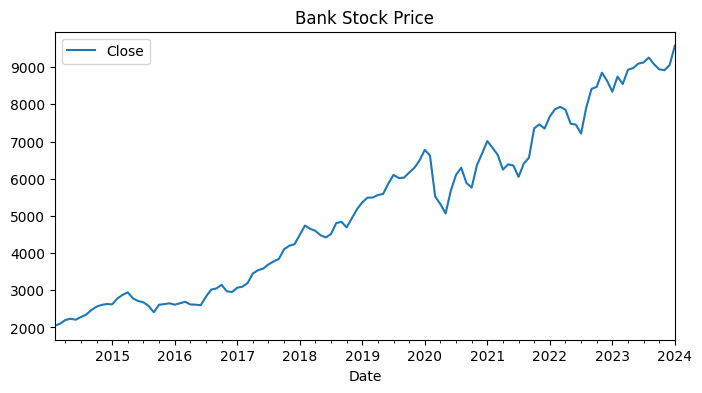

In [ ]:
df_monthly.plot(x='Date',y='Close',kind='line',figsize=(8,4),title='Bank Stock Price')

<Axes: title={'center': 'Monthly BBCA Stock Volume'}, xlabel='Date'>

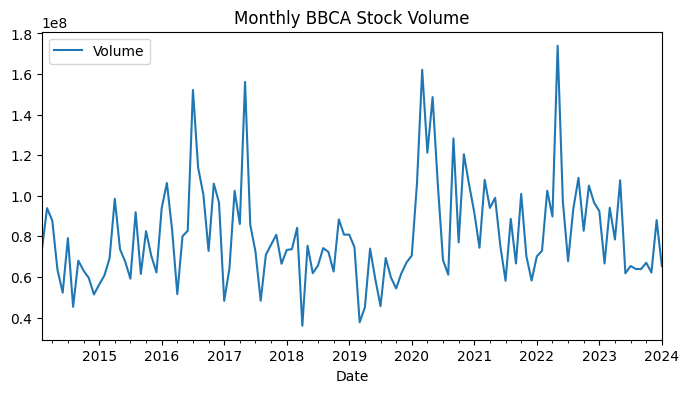

In [ ]:
df_monthly.plot(x='Date',y='Volume',kind='line',figsize=(8,4),title='Monthly BBCA Stock Volume')

# Assuming the dataset has columns like 'Date', 'Open', 'High', 'Low', 'Close', 'Volume', etc.
# For simplicity, let's use only 'Open' price as a feature and 'Close' price as target variable

In [ ]:
X = d[['Open']]
y = d['Close']

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
# Initialize the decision tree regressor
model = DecisionTreeRegressor()
#Train the model
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
# Make predictions
predictions = model.predict(X_test)

In [ ]:
predictions

array([4620.        , 5625.        , 4405.        , 6068.75      ,
       8612.5       , 4457.5       , 2510.        , 2615.35714286,
       6600.        , 2558.33333333, 3088.125     , 6015.        ,
       4298.75      , 7806.25      , 9175.        , 6030.        ,
       8462.5       , 4298.75      , 9390.        , 2187.5       ,
       2330.        , 2210.        , 2660.83333333, 5155.        ,
       6030.        , 7729.16666667, 6125.        , 2615.35714286,
       3565.        , 2600.75      , 6285.        , 3510.        ,
       5618.        , 5880.        , 6068.75      , 8871.875     ,
       5190.        , 2717.5       , 3815.        , 5970.        ,
       7405.        , 2805.        , 4785.83333333, 9600.        ,
       2205.        , 4040.        , 9057.14285714, 7968.75      ,
       6120.        , 5435.        , 6770.        , 2907.72727273,
       3088.125     , 5380.        , 8568.75      , 6533.        ,
       3063.75      , 2640.        , 2608.75      , 6120.     

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error:", mae)

Mean Squared Error: 7550.146604195235
Mean Absolute Error: 55.73373228604617


# Plot the actual vs. predicted prices

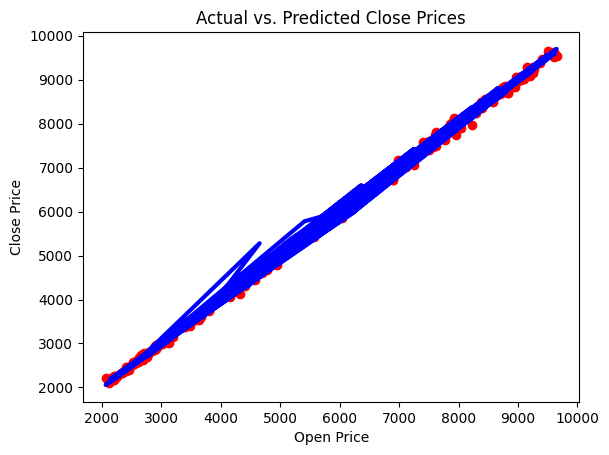

In [ ]:
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, predictions, color='blue', linewidth=3)
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.title('Actual vs. Predicted Close Prices')
plt.show()

#Regression model for Decision Tree and Train models and print their accuracy, precision, recall and f1-score


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# As this is a regression model, accuracy, f1_score, recall_score, and precision_score might not be appropriate.
# They are typically used in classification tasks.
# But you can still calculate these metrics based on certain thresholds or by treating the regression problem as a classification problem.

# For example, you can treat the problem as a classification task by setting a threshold to classify whether the predicted price is higher or lower than the actual price.
threshold = 0.5  # Adjust as per your requirement

# Convert predictions and actual prices to binary classes based on the threshold
binary_predictions = [1 if pred >= threshold else 0 for pred in predictions]
binary_actuals = [1 if actual >= threshold else 0 for actual in y_test]

# Calculate accuracy
accuracy = accuracy_score(binary_actuals, binary_predictions)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = f1_score(binary_actuals, binary_predictions)
print("F1 Score:", f1)

# Calculate recall
recall = recall_score(binary_actuals, binary_predictions)
print("Recall:", recall)

# Calculate precision
precision = precision_score(binary_actuals, binary_predictions)
print("Precision:", precision)


Accuracy: 1.0
F1 Score: 1.0
Recall: 1.0
Precision: 1.0


#Classification Model for Decision Tree and Train models and print their accuracy, precision, recall and f1-score

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# Assuming you have trained your classifier and made predictions already

# Calculate accuracy
accuracy = accuracy_score(y_test, binary_predictions)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = f1_score(y_test, binary_predictions, average='weighted')
print("F1 Score:", f1)

# Calculate recall
recall = recall_score(y_test, binary_predictions, average='weighted')
print("Recall:", recall)

# Calculate precision
precision = precision_score(y_test, binary_predictions, average='weighted')
print("Precision:", precision)


Accuracy: 0.0
F1 Score: 0.0
Recall: 0.0
Precision: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#For Classification Model in Decision Tree with plot_tree

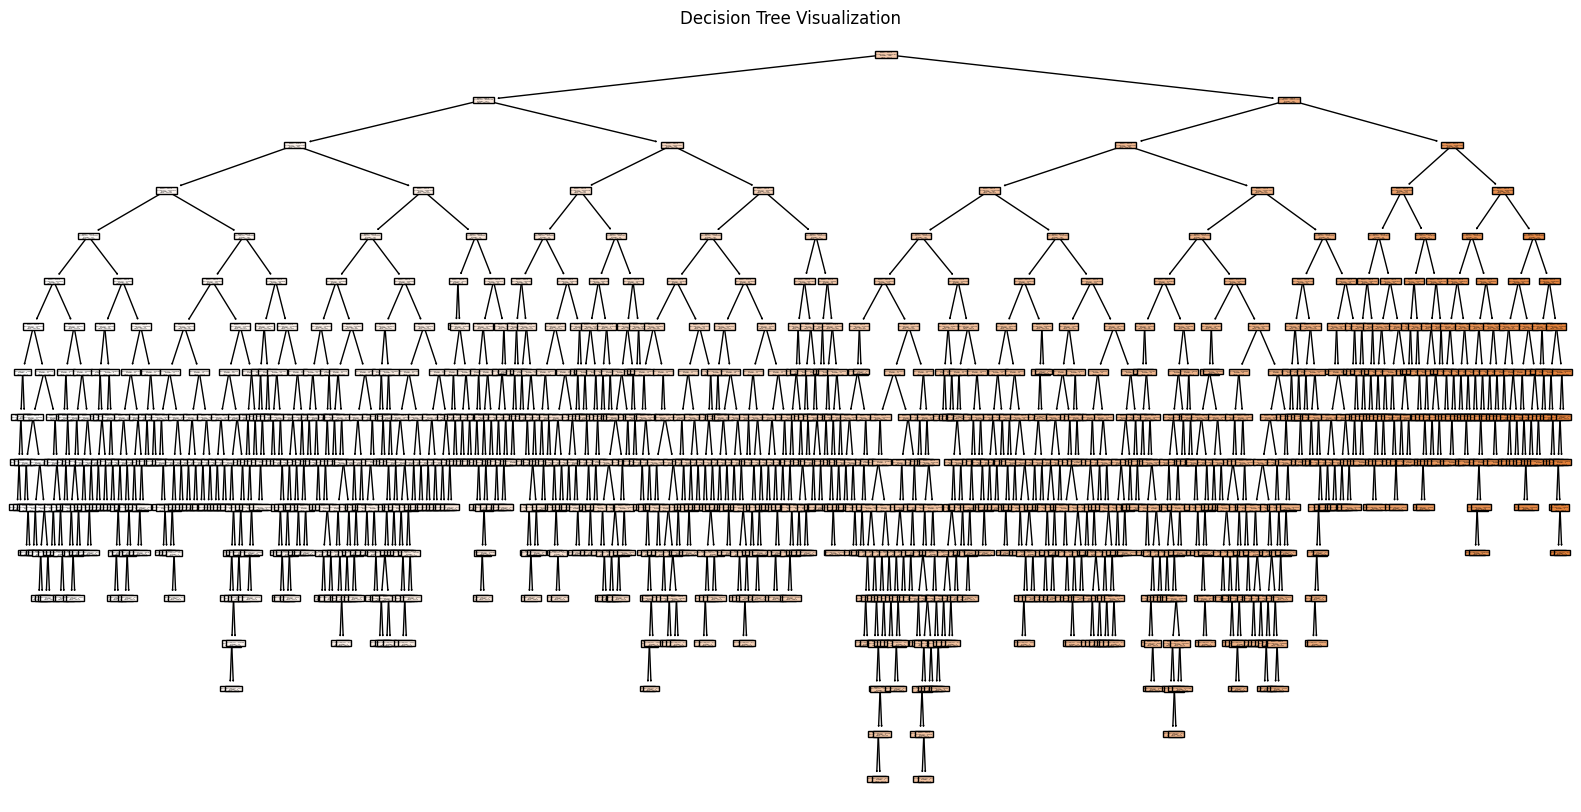

In [ ]:
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(20,10))  # Adjust the figure size as needed
plot_tree(model, filled=True, feature_names=['Open'], class_names=['0', '1'])  # Adjust feature names and class names
plt.title("Decision Tree Visualization")
plt.show()


#For Regression Model in Decision Tree with plot_tree

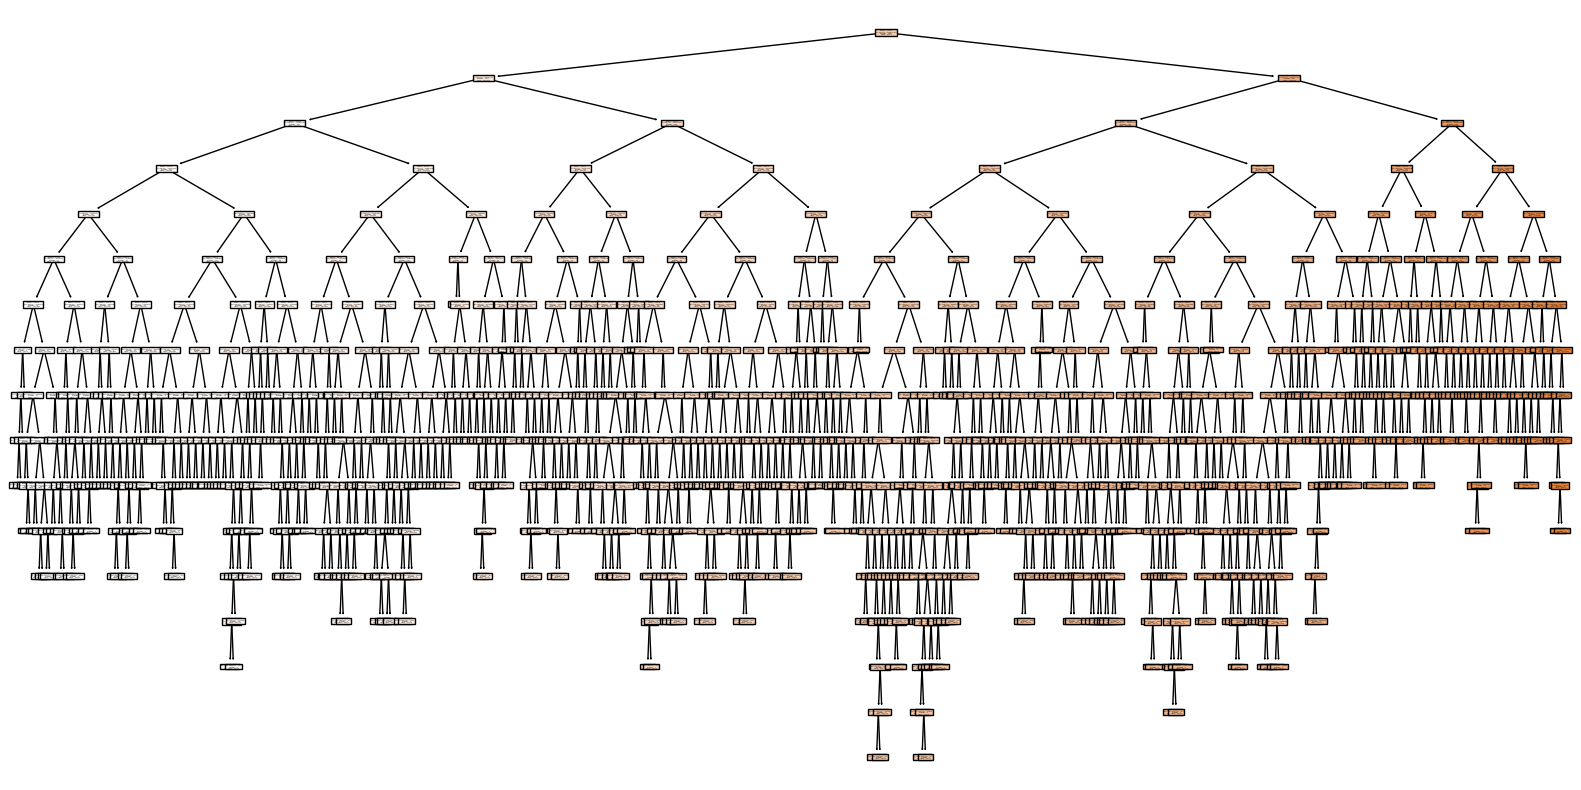

In [ ]:
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(20, 10))  # Adjust the figure size as needed
plot_tree(model, filled=True, feature_names=X.columns)
plt.show()
